In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (roc_auc_score,roc_curve,accuracy_score,classification_report,confusion_matrix)
from sklearn.pipeline import ma

In [2]:
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

In [ ]:
df.rename(columns={'Siblings/Spouses Aboard':'SibSp',
                   'Parents/Children Aboard':'Parch'
                   }, inplace=True)
df.keys()


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [19]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].copy()
y = df['Survived']

X=pd.get_dummies(X, columns=['Sex'], drop_first=True)



In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [24]:
print("Accuracy: ", f"{accuracy_score(y_test,y_pred):.4f}")
print("ROC_AUC:", f"{roc_auc_score(y_test,y_prob):.4f}")
print("\nClassification report\n", f"{classification_report(y_test,y_pred)}")

Accuracy:  0.7472
ROC_AUC: 0.8203

Classification report
               precision    recall  f1-score   support

           0       0.76      0.86      0.81       111
           1       0.71      0.55      0.62        67

    accuracy                           0.75       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.74      0.75      0.74       178



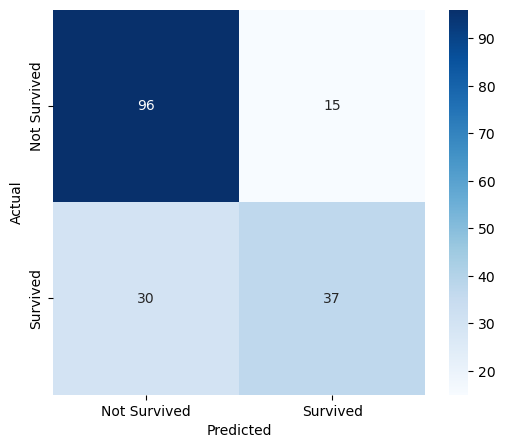

In [28]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


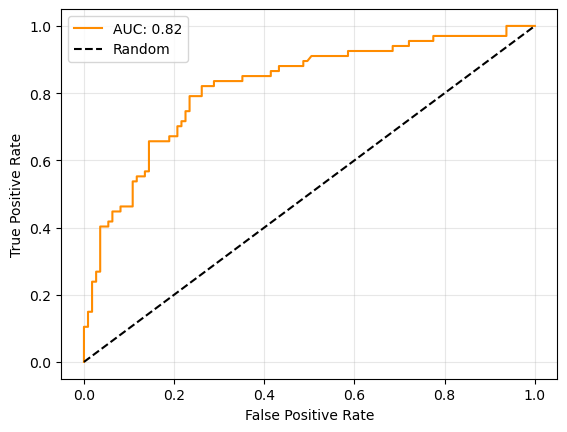

In [37]:
fpr,tpr,_ = roc_curve(y_test,y_prob)
plt.plot(fpr,tpr, color='darkorange', label=f"AUC: {roc_auc_score(y_test,y_prob):.2f}")
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(alpha=0.3)
plt.legend()
plt.show()